# Who's Gonna Win The WorldCup 2018 ?

## Introduction:

Blah, Blah, Blah.... We want to predict the results of worldcup 2018 using Logistic Regression.


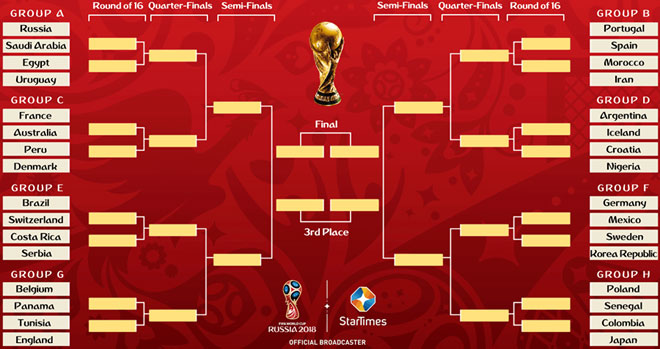

## Let's start:

   #### Importing Libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Data Preprocessing:

In [4]:
world_cup = pd.read_csv('C:/Users/aabirouch73/Desktop/pirouch files/books and learning courses/learning projects/world cup 2018 winner prediction/datasets/World Cup 2018 Dataset.csv')
results = pd.read_csv('C:/Users/aabirouch73/Desktop/pirouch files/books and learning courses/learning projects/world cup 2018 winner prediction/datasets/results.csv')

In [5]:
world_cup.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals
0,Russia,A,10,0,0,1,65,Saudi Arabia,1,-1.0,-2.0,Egypt,17,NaN,NaN,Uruguay,33,0.0,0.0
1,Saudi Arabia,A,4,0,0,0,63,Russia,1,1.0,2.0,Uruguay,18,1.0,1.0,Egypt,34,-5.0,-5.0
2,Egypt,A,2,0,0,0,31,Uruguay,2,-1.0,-2.0,Russia,17,NaN,NaN,Saudi Arabia,34,5.0,5.0
3,Uruguay,A,12,2,2,5,21,Egypt,2,1.0,2.0,Saudi Arabia,18,-1.0,-1.0,Russia,33,0.0,0.0
4,Portugal,B,6,0,0,2,3,Spain,3,-12.0,-31.0,Morocco,19,-1.0,-2.0,Iran,35,2.0,5.0


In [6]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


Adding two columns to results table, first column is for the winning team, the second is for the goal difference:

In [7]:
winner_team=[]
for i in range(len(results["home_team"])):
    if results.loc[i,"home_score"] > results.loc[i,"away_score"]:
        winner_team.append(results.loc[i,"home_team"])
    elif results.loc[i,"home_score"] < results.loc[i,"away_score"]:
        winner_team.append(results.loc[i,"away_team"])
    else:
        winner_team.append("Draw")
results['winning_team'] = winner_team


In [8]:
#results.head()
len(results)

38902

We want another columns that contain the goals diference between the two teams:

In [9]:
results["goal_diff"]=abs(results["home_score"]-results["away_score"])

In [10]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3


In [11]:
len(results)

38902

In [12]:
world_cup.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals
0,Russia,A,10,0,0,1,65,Saudi Arabia,1,-1.0,-2.0,Egypt,17,NaN,NaN,Uruguay,33,0.0,0.0
1,Saudi Arabia,A,4,0,0,0,63,Russia,1,1.0,2.0,Uruguay,18,1.0,1.0,Egypt,34,-5.0,-5.0
2,Egypt,A,2,0,0,0,31,Uruguay,2,-1.0,-2.0,Russia,17,NaN,NaN,Saudi Arabia,34,5.0,5.0
3,Uruguay,A,12,2,2,5,21,Egypt,2,1.0,2.0,Saudi Arabia,18,-1.0,-1.0,Russia,33,0.0,0.0
4,Portugal,B,6,0,0,2,3,Spain,3,-12.0,-31.0,Morocco,19,-1.0,-2.0,Iran,35,2.0,5.0


In [13]:
WC_teams=[]
df=world_cup.loc[0:31,"Team"]

In [14]:
for i in range(len(df)):
    WC_teams.append(df[i])



In [15]:
len(WC_teams)

32

In [16]:
WC_teams

['Russia',
 'Saudi Arabia',
 'Egypt',
 'Uruguay',
 'Portugal',
 'Spain',
 'Morocco',
 'Iran',
 'France',
 'Australia',
 'Peru',
 'Denmark',
 'Argentina',
 'Iceland',
 'Croatia',
 'Nigeria',
 'Brazil',
 'Switzerland',
 'Costa Rica',
 'Serbia',
 'Germany',
 'Mexico',
 'Sweden',
 'Korea Republic',
 'Belgium',
 'Panama',
 'Tunisia',
 'England',
 'Poland',
 'Senegal',
 'Colombia',
 'Japan']

In the results dataset we want just the worldcup teams, that's why we create the WC_teams list

And we will have just the data of teams participating in the worldcup:

In [17]:

df_teams_home = results[results['home_team'].isin(WC_teams)]
df_teams_away = results[results['away_team'].isin(WC_teams)]
worldcup_teams = pd.concat((df_teams_home, df_teams_away))
worldcup_teams.drop_duplicates()
worldcup_teams.count()


date            21040
home_team       21040
away_team       21040
home_score      21040
away_score      21040
tournament      21040
city            21040
country         21040
winning_team    21040
goal_diff       21040
dtype: int64

In [18]:
worldcup_teams = worldcup_teams.reset_index(drop=True)
worldcup_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_diff
0,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
1,1875-03-06,England,Scotland,2,2,Friendly,London,England,Draw,0
2,1877-03-03,England,Scotland,1,3,Friendly,London,England,Scotland,2
3,1879-01-18,England,Wales,2,1,Friendly,London,England,England,1
4,1879-04-05,England,Scotland,5,4,Friendly,London,England,England,1


Now we want to extract the matches played before 1930:

In [19]:
from dateutil import parser


In [20]:
len(worldcup_teams)

21040

In [21]:

for row in range(21040):
    year= parser.parse(worldcup_teams.loc[row,"date"]).year
    worldcup_teams.loc[row,"date"]= year
    
    
    
 

In [22]:
worldcup_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_diff
0,1873,England,Scotland,4,2,Friendly,London,England,England,2
1,1875,England,Scotland,2,2,Friendly,London,England,Draw,0
2,1877,England,Scotland,1,3,Friendly,London,England,Scotland,2
3,1879,England,Wales,2,1,Friendly,London,England,England,1
4,1879,England,Scotland,5,4,Friendly,London,England,England,1


In [23]:
worldcup_teams_1930 = worldcup_teams[worldcup_teams.date >= 1930]
worldcup_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_diff
554,1930,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,Spain,1
555,1930,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,Portugal,1
556,1930,Portugal,France,2,0,Friendly,Porto,Portugal,Portugal,2
557,1930,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,Italy,2
558,1930,France,Switzerland,3,3,Friendly,Colombes,France,Draw,0


In [24]:
len(worldcup_teams_1930)

19947

In [25]:
worldcup_teams_1930=worldcup_teams_1930.reset_index(drop=True)
len(worldcup_teams_1930)

19947

In [26]:
worldcup_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_diff
0,1930,Spain,Czechoslovakia,1,0,Friendly,Barcelona,Spain,Spain,1
1,1930,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,Portugal,1
2,1930,Portugal,France,2,0,Friendly,Porto,Portugal,Portugal,2
3,1930,Germany,Italy,0,2,Friendly,Frankfurt am Main,Germany,Italy,2
4,1930,France,Switzerland,3,3,Friendly,Colombes,France,Draw,0


deleting columns that we are not going to use:

In [27]:
drop_features=["date","home_score","away_score","tournament","city","country","goal_diff"]
for feature in drop_features:
    worldcup_teams_1930=worldcup_teams_1930.drop(feature, axis=1)


In [28]:
worldcup_teams_1930.head()

,home_team,away_team,winning_team
0,Spain,Czechoslovakia,Spain
1,Portugal,Czechoslovakia,Portugal
2,Portugal,France,Portugal
3,Germany,Italy,Italy
4,France,Switzerland,Draw


## <p>Building the model</p>
<p>the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.</p>


In [29]:
for row in range(19947):
    if worldcup_teams_1930.loc[row,"winning_team"]==worldcup_teams_1930.loc[row,"home_team"]:
        worldcup_teams_1930.loc[row,"winning_team"]= 2
    elif worldcup_teams_1930.loc[row,"winning_team"]==worldcup_teams_1930.loc[row,"away_team"]:
        worldcup_teams_1930.loc[row,"winning_team"]= 0
    else:
        worldcup_teams_1930.loc[row,"winning_team"]= 1

In [30]:
 worldcup_teams_1930.head()

,home_team,away_team,winning_team
0,Spain,Czechoslovakia,2
1,Portugal,Czechoslovakia,2
2,Portugal,France,2
3,Germany,Italy,0
4,France,Switzerland,1


convert home team and away team from categorical variables to continous inputs Get dummy variables

In [31]:

final = pd.get_dummies(worldcup_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

final.head()

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

C:\Users\aabirouch73\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aabirouch73\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
print("Training set accuracy: ", score)
print("Test set accuracy: ", score2)

Training set accuracy:  0.5719094685575132
Test set accuracy:  0.5600668337510443


#### <p>Adding Fifa rankings:</p>
the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match and therefore, will be positioned under the "home_teams" column since there are no "home" or "away" teams in World Cup games.

In [35]:

# Loading new datasets
fifa_ranking = pd.read_csv('C:/Users/aabirouch73/Desktop/pirouch files/books and learning courses/learning projects/world cup 2018 winner prediction/datasets/fifa_rankings.csv') 
fixtures = pd.read_csv('C:/Users/aabirouch73/Desktop/pirouch files/books and learning courses/learning projects/world cup 2018 winner prediction/datasets/fixtures.csv')


In [36]:
fixtures.head()

,Round Number,Date,Location,Home Team,Away Team,Group,Result
0,1,14/06/2018 18:00,"Luzhniki Stadium, Moscow",Russia,Saudi Arabia,Group A,NaN
1,1,15/06/2018 15:00,Ekaterinburg Stadium,Egypt,Uruguay,Group A,NaN
2,1,15/06/2018 18:00,Saint Petersburg Stadium,Morocco,Iran,Group B,NaN
3,1,15/06/2018 21:00,"Fisht Stadium, Sochi",Portugal,Spain,Group B,NaN
4,1,16/06/2018 13:00,Kazan Arena,France,Australia,Group C,NaN


In [37]:
fifa_ranking.head()

,Position,Team,Points
0,1,Germany,1533.0
1,2,Brazil,1384.0
2,3,Belgium,1346.0
3,4,Portugal,1306.0
4,5,Argentina,1254.0


In [38]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(fifa_ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(fifa_ranking.set_index('Team')['Position']))

In [39]:
fixtures = fixtures.iloc[:48, :]
fixtures.head()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
0,1,66.0,70.0,14/06/2018 18:00,"Luzhniki Stadium, Moscow",Russia,Saudi Arabia,Group A,NaN
1,1,46.0,17.0,15/06/2018 15:00,Ekaterinburg Stadium,Egypt,Uruguay,Group A,NaN
2,1,42.0,36.0,15/06/2018 18:00,Saint Petersburg Stadium,Morocco,Iran,Group B,NaN
3,1,4.0,8.0,15/06/2018 21:00,"Fisht Stadium, Sochi",Portugal,Spain,Group B,NaN
4,1,7.0,40.0,16/06/2018 13:00,Kazan Arena,France,Australia,Group C,NaN


In [40]:
len(fixtures)

48

In [41]:
prediction_df = pd.DataFrame(columns=['away_team', 'home_team', 'winning_team'])
for row in range(48):
    a=fixtures.loc[row,"Away Team"]
    h=fixtures.loc[row,"Home Team"]
    if fixtures.loc[row,"first_position"] < fixtures.loc[row,"second_position"]:
        
        prediction_df.loc[row,"away_team"]=a
        prediction_df.loc[row,"home_team"]=h
    else:
        
        prediction_df.loc[row,"away_team"]=h
        prediction_df.loc[row,"home_team"]=a


In [42]:
prediction_df.head()

,away_team,home_team,winning_team
0,Saudi Arabia,Russia,NaN
1,Egypt,Uruguay,NaN
2,Morocco,Iran,NaN
3,Spain,Portugal,NaN
4,Australia,France,NaN


In [43]:
backup_prediction_df = prediction_df

In [44]:
# Get dummy variables and drop winning_team column
prediction_df = pd.get_dummies(prediction_df, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
prediction_df.head()

,winning_team,home_team_Argentina,home_team_Belgium,home_team_Brazil,home_team_Colombia,home_team_Costa Rica,home_team_Croatia,home_team_Denmark,home_team_Egypt,home_team_England,...,away_team_Panama,away_team_Peru,away_team_Russia,away_team_Saudi Arabia,away_team_Senegal,away_team_Serbia,away_team_Spain,away_team_Sweden,away_team_Switzerland,away_team_Tunisia
0,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(prediction_df.columns)
for c in missing_cols:
    prediction_df[c] = 0
prediction_df = prediction_df[final.columns]
prediction_df.head()

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:

# Remove winning team column
prediction_df = prediction_df.drop(['winning_team'], axis=1)

prediction_df.head()


,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#Prediction
matchs_prediction=logreg.predict(prediction_df)


In [48]:
matchs_prediction

array([2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0])

In [49]:
groups_results= world_cup.loc[:,["Team","Group"]]
groups_results["score"] = np.nan

In [50]:
groups_results

,Team,Group,score
0,Russia,A,NaN
1,Saudi Arabia,A,NaN
2,Egypt,A,NaN
3,Uruguay,A,NaN
4,Portugal,B,NaN
5,Spain,B,NaN
6,Morocco,B,NaN
7,Iran,B,NaN
8,France,C,NaN
9,Australia,C,NaN


In [51]:
groups_scores = pd.DataFrame(columns=['team1', 'team2', 'score_team1','score_team2'])

In [52]:
groups_scores

,team1,team2,score_team1,score_team2


In [53]:
#group matches 

for i in range(48):
    print(backup_prediction_df.iloc[i, 1] + " VS " + backup_prediction_df.iloc[i, 0])
    if matchs_prediction[i] == 2:
        print("Winner: " + backup_prediction_df.iloc[i, 1])
        groups_scores.loc[i,"team1"]=backup_prediction_df.iloc[i, 1]
        groups_scores.loc[i,"score_team1"]=3
        groups_scores.loc[i,"team2"]=backup_prediction_df.iloc[i,0]
        groups_scores.loc[i,"score_team2"]=0
    elif matchs_prediction[i] == 1:
        groups_scores.loc[i,"team1"]=backup_prediction_df.iloc[i, 1]
        groups_scores.loc[i,"score_team1"]=1
        groups_scores.loc[i,"team2"]=backup_prediction_df.iloc[i,0]
        groups_scores.loc[i,"score_team2"]=1
        print("Draw")
    elif matchs_prediction[i] == 0:
        print("Winner: " + backup_prediction_df.iloc[i, 0])
        groups_scores.loc[i,"team2"]=backup_prediction_df.iloc[i,0]
        groups_scores.loc[i,"score_team2"]=3
        groups_scores.loc[i,"team1"]=backup_prediction_df.iloc[i, 1]
        groups_scores.loc[i,"score_team1"]=0
    print('Probability of ' + backup_prediction_df.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(prediction_df)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(prediction_df)[i][1]))
    print('Probability of ' + backup_prediction_df.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(prediction_df)[i][0]))
    print("")

Russia VS Saudi Arabia
Winner: Russia
Probability of Russia winning:  0.679
Probability of Draw:  0.200
Probability of Saudi Arabia winning:  0.121

Uruguay VS Egypt
Winner: Uruguay
Probability of Uruguay winning:  0.553
Probability of Draw:  0.370
Probability of Egypt winning:  0.077

Iran VS Morocco
Draw
Probability of Iran winning:  0.346
Probability of Draw:  0.405
Probability of Morocco winning:  0.249

Portugal VS Spain
Winner: Spain
Probability of Portugal winning:  0.340
Probability of Draw:  0.306
Probability of Spain winning:  0.354

France VS Australia
Winner: France
Probability of France winning:  0.655
Probability of Draw:  0.228
Probability of Australia winning:  0.117

Argentina VS Iceland
Winner: Argentina
Probability of Argentina winning:  0.832
Probability of Draw:  0.133
Probability of Iceland winning:  0.036

Peru VS Denmark
Winner: Peru
Probability of Peru winning:  0.463
Probability of Draw:  0.175
Probability of Denmark winning:  0.362

Croatia VS Nigeria
Winner:

In [54]:
groups_scores

,team1,team2,score_team1,score_team2
0,Russia,Saudi Arabia,3,0
1,Uruguay,Egypt,3,0
2,Iran,Morocco,1,1
3,Portugal,Spain,0,3
4,France,Australia,3,0
5,Argentina,Iceland,3,0
6,Peru,Denmark,3,0
7,Croatia,Nigeria,3,0
8,Costa Rica,Serbia,3,0
9,Germany,Mexico,3,0


In [55]:
for i in range(32):
    groups_results.loc[i,"score"]=0

In [56]:
groups_results.head()

,Team,Group,score
0,Russia,A,0.0
1,Saudi Arabia,A,0.0
2,Egypt,A,0.0
3,Uruguay,A,0.0
4,Portugal,B,0.0


In [57]:
for team_r in range(32):
    for team1_s in range(48):
        if groups_results.loc[team_r,"Team"]==groups_scores.loc[team1_s,"team1"]:
            
            groups_results.loc[team_r,"score"]=groups_scores.loc[team1_s,"score_team1"]+groups_results.loc[team_r,"score"]
    for team2_s in range(48):
        if groups_results.loc[team_r,"Team"]==groups_scores.loc[team2_s,"team2"]:
            
            groups_results.loc[team_r,"score"]=groups_scores.loc[team2_s,"score_team2"]+groups_results.loc[team_r,"score"]
            

In [58]:
groups_results

,Team,Group,score
0,Russia,A,7.0
1,Saudi Arabia,A,0.0
2,Egypt,A,3.0
3,Uruguay,A,7.0
4,Portugal,B,6.0
5,Spain,B,9.0
6,Morocco,B,1.0
7,Iran,B,1.0
8,France,C,9.0
9,Australia,C,0.0


In [59]:
round_for_16=groups_results[groups_results["score"]>=6].reset_index(drop=True)

In [60]:
round_for_16

,Team,Group,score
0,Russia,A,7.0
1,Uruguay,A,7.0
2,Portugal,B,6.0
3,Spain,B,9.0
4,France,C,9.0
5,Peru,C,6.0
6,Argentina,D,9.0
7,Croatia,D,6.0
8,Brazil,E,9.0
9,Switzerland,E,6.0


In [61]:
group_16 = [('Uruguay', 'Portugal'),
            ('France', 'Argentina'),
            ('Brazil', 'Germany'),
            ('England', 'Poland'),
            ('Spain', 'Russia'),
            ('Croatia', 'Peru'),
            ('Mexico', 'Switzerland'),
            ('Colombia', 'Belgium')]

In [62]:
def clean_and_predict(matches, fifa_ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(fifa_ranking.loc[fifa_ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(fifa_ranking.loc[fifa_ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [63]:
clean_and_predict(group_16, fifa_ranking, final, logreg)

Portugal and Uruguay
Winner: Portugal
Probability of Portugal winning:  0.479
Probability of Draw:  0.264
Probability of Uruguay winning:  0.256

Argentina and France
Winner: Argentina
Probability of Argentina winning:  0.629
Probability of Draw:  0.216
Probability of France winning:  0.155

Germany and Brazil
Winner: Brazil
Probability of Germany winning:  0.368
Probability of Draw:  0.200
Probability of Brazil winning:  0.431

Poland and England
Winner: England
Probability of Poland winning:  0.209
Probability of Draw:  0.344
Probability of England winning:  0.447

Spain and Russia
Winner: Spain
Probability of Spain winning:  0.518
Probability of Draw:  0.281
Probability of Russia winning:  0.201

Peru and Croatia
Winner: Croatia
Probability of Peru winning:  0.303
Probability of Draw:  0.276
Probability of Croatia winning:  0.421

Switzerland and Mexico
Winner: Switzerland
Probability of Switzerland winning:  0.383
Probability of Draw:  0.258
Probability of Mexico winning:  0.359

B

In [64]:
# List of matches
quarters = [('Portugal', 'Argentina'),
            ('Spain', 'France'),
            ('Brazil', 'Belgium'),
            ('Germany', 'England')]

In [65]:
clean_and_predict(quarters, fifa_ranking, final, logreg)

Portugal and Argentina
Winner: Argentina
Probability of Portugal winning:  0.328
Probability of Draw:  0.310
Probability of Argentina winning:  0.363

France and Spain
Winner: France
Probability of France winning:  0.385
Probability of Draw:  0.262
Probability of Spain winning:  0.353

Brazil and Belgium
Winner: Brazil
Probability of Brazil winning:  0.722
Probability of Draw:  0.183
Probability of Belgium winning:  0.095

Germany and England
Winner: Germany
Probability of Germany winning:  0.415
Probability of Draw:  0.275
Probability of England winning:  0.311



In [66]:
# List of matches
semi = [('France', 'Brazil'),
        ('Argentina', 'Germany')]

In [67]:
clean_and_predict(semi, fifa_ranking, final, logreg)

Brazil and France
Winner: Brazil
Probability of Brazil winning:  0.671
Probability of Draw:  0.170
Probability of France winning:  0.159

Germany and Argentina
Winner: Germany
Probability of Germany winning:  0.440
Probability of Draw:  0.253
Probability of Argentina winning:  0.307



In [68]:
finals=[('Brazil', 'Germany')]

In [69]:
clean_and_predict(finals, fifa_ranking, final, logreg)

Germany and Brazil
Winner: Brazil
Probability of Germany winning:  0.368
Probability of Draw:  0.200
Probability of Brazil winning:  0.431



The model predict the Brazil as the winner.